In [1]:
import pandas as pd


In [2]:

df=pd.read_csv("covid.csv")
df

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
6717,6718,03/18/2020,NaN,Guernsey,2020-03-17T18:33:03,0.0,0.0,0.0
6718,6719,03/18/2020,NaN,Jersey,2020-03-17T18:33:03,0.0,0.0,0.0
6719,6720,03/18/2020,NaN,Puerto Rico,2020-03-17T16:13:14,0.0,0.0,0.0
6720,6721,03/18/2020,NaN,Republic of the Congo,2020-03-17T21:33:03,0.0,0.0,0.0


In [3]:
df.isnull().sum()

SNo                   0
ObservationDate       0
Province/State     2766
Country/Region        0
Last Update           0
Confirmed             0
Deaths                0
Recovered             0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6722 entries, 0 to 6721
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   SNo              6722 non-null   int64  
 1   ObservationDate  6722 non-null   object 
 2   Province/State   3956 non-null   object 
 3   Country/Region   6722 non-null   object 
 4   Last Update      6722 non-null   object 
 5   Confirmed        6722 non-null   float64
 6   Deaths           6722 non-null   float64
 7   Recovered        6722 non-null   float64
dtypes: float64(3), int64(1), object(4)
memory usage: 420.2+ KB


In [5]:
cols=df.columns
cols

Index(['SNo', 'ObservationDate', 'Province/State', 'Country/Region',
       'Last Update', 'Confirmed', 'Deaths', 'Recovered'],
      dtype='object')

In [6]:
df.columns=[col.lower() for col in cols]
df.columns

Index(['sno', 'observationdate', 'province/state', 'country/region',
       'last update', 'confirmed', 'deaths', 'recovered'],
      dtype='object')

In [7]:
df.rename(columns={"observationdate":"observation_date",
                  "province/state":"province",
                  "country/region":"country",
                  "last update":"last_update",
                  },inplace=True)
df.head()

,sno,observation_date,province,country,last_update,confirmed,deaths,recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [8]:
sorted(df.country.unique())

[' Azerbaijan',
 "('St. Martin',)",
 'Afghanistan',
 'Albania',
 'Algeria',
 'Andorra',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Aruba',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Benin',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cayman Islands',
 'Central African Republic',
 'Channel Islands',
 'Chile',
 'Colombia',
 'Congo (Brazzaville)',
 'Congo (Kinshasa)',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Curacao',
 'Cyprus',
 'Czech Republic',
 'Denmark',
 'Djibouti',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'Equatorial Guinea',
 'Estonia',
 'Eswatini',
 'Ethiopia',
 'Faroe Islands',
 'Finland',
 'France',
 'French Guiana',
 'Gabon',
 'Gambia, The',
 'Georgia',
 'Germany',
 'Ghana',
 'Gibraltar',
 'Greece',
 'Greenland',
 'Guadeloupe',
 'Guam',
 'Guatemala',
 'Guernsey',
 'Guinea',
 'Guyana',
 'Holy See',
 'Honduras

In [9]:
import re

In [10]:
def cleancountry(country):
    country=country.lower().strip()
    country=re.sub(r"[^a-z\s]+","",country)
    country="china" if country=="mainland china" else country
    country=country.capitalize()
    return country

In [11]:
df["country"]=df["country"].apply(lambda country:cleancountry(country))

In [12]:
df

,sno,observation_date,province,country,last_update,confirmed,deaths,recovered
0,1,01/22/2020,Anhui,China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,China,1/22/2020 17:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
6717,6718,03/18/2020,NaN,Guernsey,2020-03-17T18:33:03,0.0,0.0,0.0
6718,6719,03/18/2020,NaN,Jersey,2020-03-17T18:33:03,0.0,0.0,0.0
6719,6720,03/18/2020,NaN,Puerto rico,2020-03-17T16:13:14,0.0,0.0,0.0
6720,6721,03/18/2020,NaN,Republic of the congo,2020-03-17T21:33:03,0.0,0.0,0.0


In [13]:
country_group=df.groupby(by=["country" ,"observation_date"]).agg({"confirmed":"sum","deaths":"sum","recovered":"sum"}).sort_values(by=["country","observation_date"],ascending=[True,True])

In [14]:
country_group

confirmed  deaths  recovered
country     observation_date                              
Afghanistan 02/24/2020              1.0     0.0        0.0
            02/25/2020              1.0     0.0        0.0
            02/26/2020              1.0     0.0        0.0
            02/27/2020              1.0     0.0        0.0
            02/28/2020              1.0     0.0        0.0
...                                 ...     ...        ...
Vietnam     03/15/2020             56.0     0.0       16.0
            03/16/2020             61.0     0.0       16.0
            03/17/2020             66.0     0.0       16.0
            03/18/2020             75.0     0.0       16.0
Zambia      03/18/2020              2.0     0.0        0.0

[3228 rows x 3 columns]

In [15]:
indexes=country_group.reset_index()
indexes

,country,observation_date,confirmed,deaths,recovered
0,Afghanistan,02/24/2020,1.0,0.0,0.0
1,Afghanistan,02/25/2020,1.0,0.0,0.0
2,Afghanistan,02/26/2020,1.0,0.0,0.0
3,Afghanistan,02/27/2020,1.0,0.0,0.0
4,Afghanistan,02/28/2020,1.0,0.0,0.0
...,...,...,...,...,...
3223,Vietnam,03/15/2020,56.0,0.0,16.0
3224,Vietnam,03/16/2020,61.0,0.0,16.0
3225,Vietnam,03/17/2020,66.0,0.0,16.0
3226,Vietnam,03/18/2020,75.0,0.0,16.0


In [16]:
import numpy as np
def check_monotonic_increase(grp):
    if np.sum(np.diff(grp)<0)>0:
        return False
    else:
        return True

def force_monotonic_increase(grp):
    if np.sum(np.diff(grp)<0)>0:
        return(sorted(grp))
    else:
        return(grp)
    
        

In [17]:
monitor=indexes.groupby(by=["country"]).transform(lambda x: check_monotonic_increase(x))
monitor

,confirmed,deaths,recovered
0,True,True,True
1,True,True,True
2,True,True,True
3,True,True,True
4,True,True,True
...,...,...,...
3223,True,True,True
3224,True,True,True
3225,True,True,True
3226,True,True,True


In [18]:
monitor=monitor.apply(lambda x: x["confirmed"] and x["deaths"] and x["recovered"], axis=1)
monitor

0       True
1       True
2       True
3       True
4       True
        ... 
3223    True
3224    True
3225    True
3226    True
3227    True
Length: 3228, dtype: bool

In [19]:
non_monotonic=indexes.iloc[np.where(monitor==False)]
non_monotonic

,country,observation_date,confirmed,deaths,recovered
57,Andorra,03/02/2020,1.0,0.0,0.0
58,Andorra,03/03/2020,1.0,0.0,0.0
59,Andorra,03/04/2020,1.0,0.0,0.0
60,Andorra,03/05/2020,1.0,0.0,0.0
61,Andorra,03/06/2020,1.0,0.0,0.0
...,...,...,...,...,...
2633,South korea,03/16/2020,8236.0,75.0,1137.0
2634,South korea,03/17/2020,8320.0,81.0,1407.0
2635,South korea,03/18/2020,8413.0,84.0,1540.0
2939,The gambia,03/17/2020,1.0,0.0,0.0


In [20]:
non_monotonic["country"].unique()

array(['Andorra', 'Australia', 'Austria', 'Azerbaijan', 'Bahrain',
       'Egypt', 'Guam', 'Guernsey', 'Hong kong', 'Iceland', 'Iraq',
       'Italy', 'Japan', 'Jersey', 'Lebanon', 'Montenegro',
       'Occupied palestinian territory', 'Others', 'Puerto rico',
       'Republic of the congo', 'Russia', 'Saint barthelemy',
       'South korea', 'The gambia'], dtype=object)

In [21]:
monitor=indexes.groupby(by=["country"]).transform(lambda grp:force_monotonic_increase(grp))
indexes[monitor.columns]=monitor.values

In [22]:
monitor=indexes.groupby(by=["country"]).transform(lambda grp: check_monotonic_increase(grp))


In [23]:
monitor=monitor.apply(lambda x: x["confirmed"] and x["deaths"] and x["recovered"], axis=1)

In [24]:
non_monotonic=indexes.iloc[np.where(monitor==False)]

In [25]:
print(non_monotonic["country"].unique())

[]


In [26]:
indexes["observation_date"]=pd.to_datetime(indexes["observation_date"])
indexes

,country,observation_date,confirmed,deaths,recovered
0,Afghanistan,2020-02-24,1.0,0.0,0.0
1,Afghanistan,2020-02-25,1.0,0.0,0.0
2,Afghanistan,2020-02-26,1.0,0.0,0.0
3,Afghanistan,2020-02-27,1.0,0.0,0.0
4,Afghanistan,2020-02-28,1.0,0.0,0.0
...,...,...,...,...,...
3223,Vietnam,2020-03-15,56.0,0.0,16.0
3224,Vietnam,2020-03-16,61.0,0.0,16.0
3225,Vietnam,2020-03-17,66.0,0.0,16.0
3226,Vietnam,2020-03-18,75.0,0.0,16.0


In [27]:
date_scores=indexes.groupby(by=["observation_date"]).agg({"confirmed":"sum","deaths":"sum","recovered":"sum"}).reset_index()

In [28]:
date_scores.head()

,observation_date,confirmed,deaths,recovered
0,2020-01-22,554.0,17.0,28.0
1,2020-01-23,654.0,18.0,30.0
2,2020-01-24,941.0,26.0,36.0
3,2020-01-25,1438.0,42.0,39.0
4,2020-01-26,2118.0,56.0,52.0


In [29]:
date_scores["day_since"]=(date_scores["observation_date"]-date_scores["observation_date"].min()).dt.days

In [30]:
date_scores.head()

,observation_date,confirmed,deaths,recovered,day_since
0,2020-01-22,554.0,17.0,28.0,0
1,2020-01-23,654.0,18.0,30.0,1
2,2020-01-24,941.0,26.0,36.0,2
3,2020-01-25,1438.0,42.0,39.0,3
4,2020-01-26,2118.0,56.0,52.0,4


In [31]:
date_scores["infected"]=date_scores["confirmed"]-(date_scores["recovered"]+date_scores["deaths"])

In [45]:
date_scores.head(24)

,observation_date,confirmed,deaths,recovered,day_since,infected
0,2020-01-22,554.0,17.0,28.0,0,509.0
1,2020-01-23,654.0,18.0,30.0,1,606.0
2,2020-01-24,941.0,26.0,36.0,2,879.0
3,2020-01-25,1438.0,42.0,39.0,3,1357.0
4,2020-01-26,2118.0,56.0,52.0,4,2010.0
5,2020-01-27,2927.0,82.0,61.0,5,2784.0
6,2020-01-28,5578.0,131.0,107.0,6,5340.0
7,2020-01-29,6165.0,133.0,126.0,7,5906.0
8,2020-01-30,8235.0,171.0,143.0,8,7921.0
9,2020-01-31,9925.0,213.0,222.0,9,9490.0


# Modelling

In [33]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [34]:
X=date_scores["day_since"].values.reshape(-1,1)
y=date_scores["confirmed"].values.reshape(-1,1)

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [36]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression()

In [37]:
print(regressor.intercept_)
print(regressor.coef_)

[-10667.89802914]
[[2849.57615427]]


In [38]:
y_pred = regressor.predict(X_test)

In [39]:
y_pred

array([[ 89067.26737046],
       [ 86217.69121619],
       [106164.72429611],
       [ 66270.65813627],
       [ 20677.43966788],
       [ -4968.7457206 ],
       [ 83368.11506191],
       [148908.36661023],
       [ 52022.77736489],
       [146058.79045595],
       [   730.40658795],
       [ 17827.8635136 ]])

In [40]:
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df

,Actual,Predicted
0,81388.0,89067.267370
1,80415.0,86217.691216
2,92834.0,106164.724296
3,75138.0,66270.658136
4,16787.0,20677.439668
5,941.0,-4968.745721
6,79570.0,83368.115062
7,214927.0,148908.366610
8,60371.0,52022.777365
9,197204.0,146058.790456


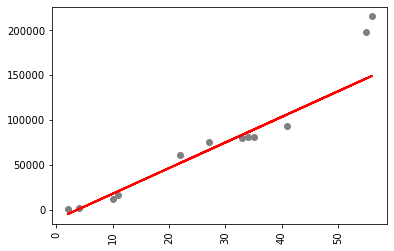

In [41]:
plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.xticks(rotation="vertical")
plt.show()

In [42]:

R2 = metrics.r2_score(y_test, y_pred)
print('R^2:' , R2)
n = X_test.shape[0] #sample size
p = X_test.shape[1] #number of predictors
print('Adjusted R^2 :' , 1-(1-R2)*(n-1)/(n-p-1))
print('Adjusted R^2 :'  , 1 - metrics.r2_score(y_test, y_pred))
print('Mean Absolute Error:' , metrics.mean_absolute_error(y_test, y_pred)) 
print('Mean Squared Error:' , metrics.mean_squared_error(y_test, y_pred)) 
print('Root Mean Squared Error:' , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R^2: 0.8593417600907597
Adjusted R^2 : 0.8452759360998356
Adjusted R^2 : 0.1406582399092403
Mean Absolute Error: 15163.98730762092
Mean Squared Error: 624408316.5088426
Root Mean Squared Error: 24988.163528135527


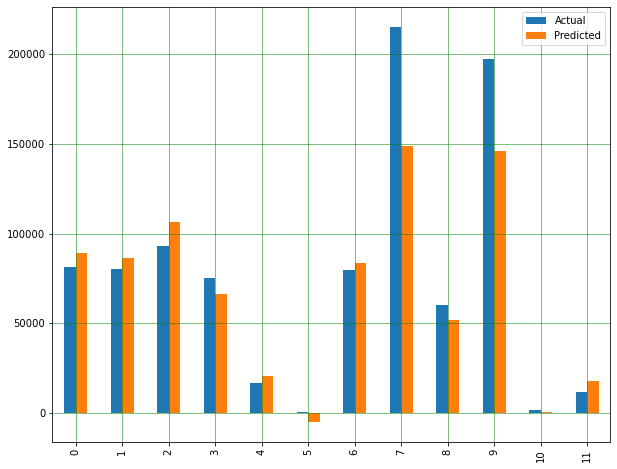

In [43]:
df.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()